## Simulating any compartmental model using the `Spp` class with time-dependent parameters

In the present notebook, we show how (most) compartmenal models can be simulated using the `pyross.deterministic.Spp` class. In addition to the standard functionality of `Spp`, we show here how an arbitary time-dependence of parameters can be specified

In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

### The SIR model

Below you will find the model-specification dictionary for the SIR model with some constant injection into the I class (corresponding to the immigration of infecteds):

In [2]:
model_spec = {
    "classes" : ["S", "I"],

    "S" : { 
        "infection" : [ ["I", "-beta"] ]
    },

    "I" : {
        "constant"  : [ ["k"] ],
        "linear"    : [ ["I", "-gamma"] ],
        "infection" : [ ["I", "beta"] ]
    }
}



This corresponds to

$$
\begin{aligned}
\dot{S}_i & =  - \beta \sum_j C_{ij} \frac{I_j}{N_j} S_i \\
\dot{I}_i & = k(t) + \beta \sum_j C_{ij} \frac{I_j}{N_j} S_i - \gamma I_i \\
\dot{R}_i & = \gamma I_i
\end{aligned}
$$

See example 16 for the syntax of `Spp`

Next, we define the parameter values:

In [3]:
parameters = {
    'beta' : 0.1,
    'gamma' : 0.1, 
    'ki' : 30, 
    'kf' : 0, 
}

We want to specify that after day 20, borders are closed, so the parameter $k(t)$ drops from `ki` to zero. For this purpose, we specify a time dependent mapping of above parameters to the parameters of the model.

In [4]:
def parameter_mapping(input_parameters, t):
    output_parameters = {
        'beta' : input_parameters['beta'] ,
        'gamma' : input_parameters['gamma'] 
    }
    if t<20:
        output_parameters['k'] = input_parameters['ki']
    else:
        output_parameters['k'] = input_parameters['kf']
    return output_parameters

In [5]:
M = 3                
Ni = 1000*np.ones(M)
N = np.sum(Ni) 


# Initial conditions as an array
x0 = np.array([
    999, 1000, 1000, # S
    1,   0,    0,    # I
])

# Or initial conditions as a dictionary 
I0 = [10, 10, 10]
S0 = [n-20 for n in Ni]

x0 = {
    'S' : S0,
    'I' : I0 
}

CM = np.array([
    [1,   0.5, 0.1],
    [0.5, 1,   0.5],
    [0.1, 0.5, 1  ]
], dtype=float)

def contactMatrix(t):  
    return CM

# duration of simulation and data file
Tf = 160;  Nf=Tf+1; 

model = pyross.stochastic.Spp(model_spec, parameters, M, Ni, time_dep_param_mapping=parameter_mapping)
# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

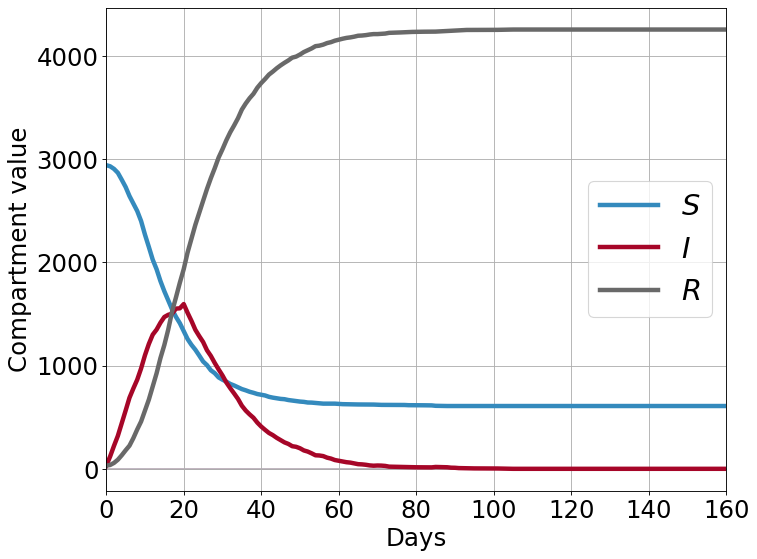

In [6]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');

We can use `pyross.deterministic.Spp.update_model_parameters` to change the parameters from what we set them initially:

In [7]:
parameters = {
    'beta' : 0.1,
    'gamma' : 0.1,
    'ki': 0,
    'kf': 0
    
}

model.update_model_parameters(parameters)

# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

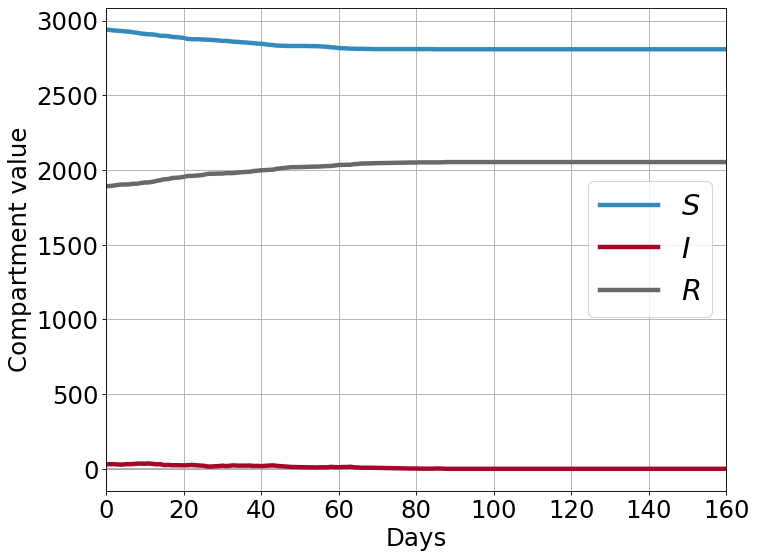

In [8]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');